In [93]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

load in data

In [53]:
df = pd.read_csv('C:/Users/Lenovo/Desktop/winequality-red.csv')
df.shape

(1599, 12)

colinearity: doesn't affect prediction but affect variable importance

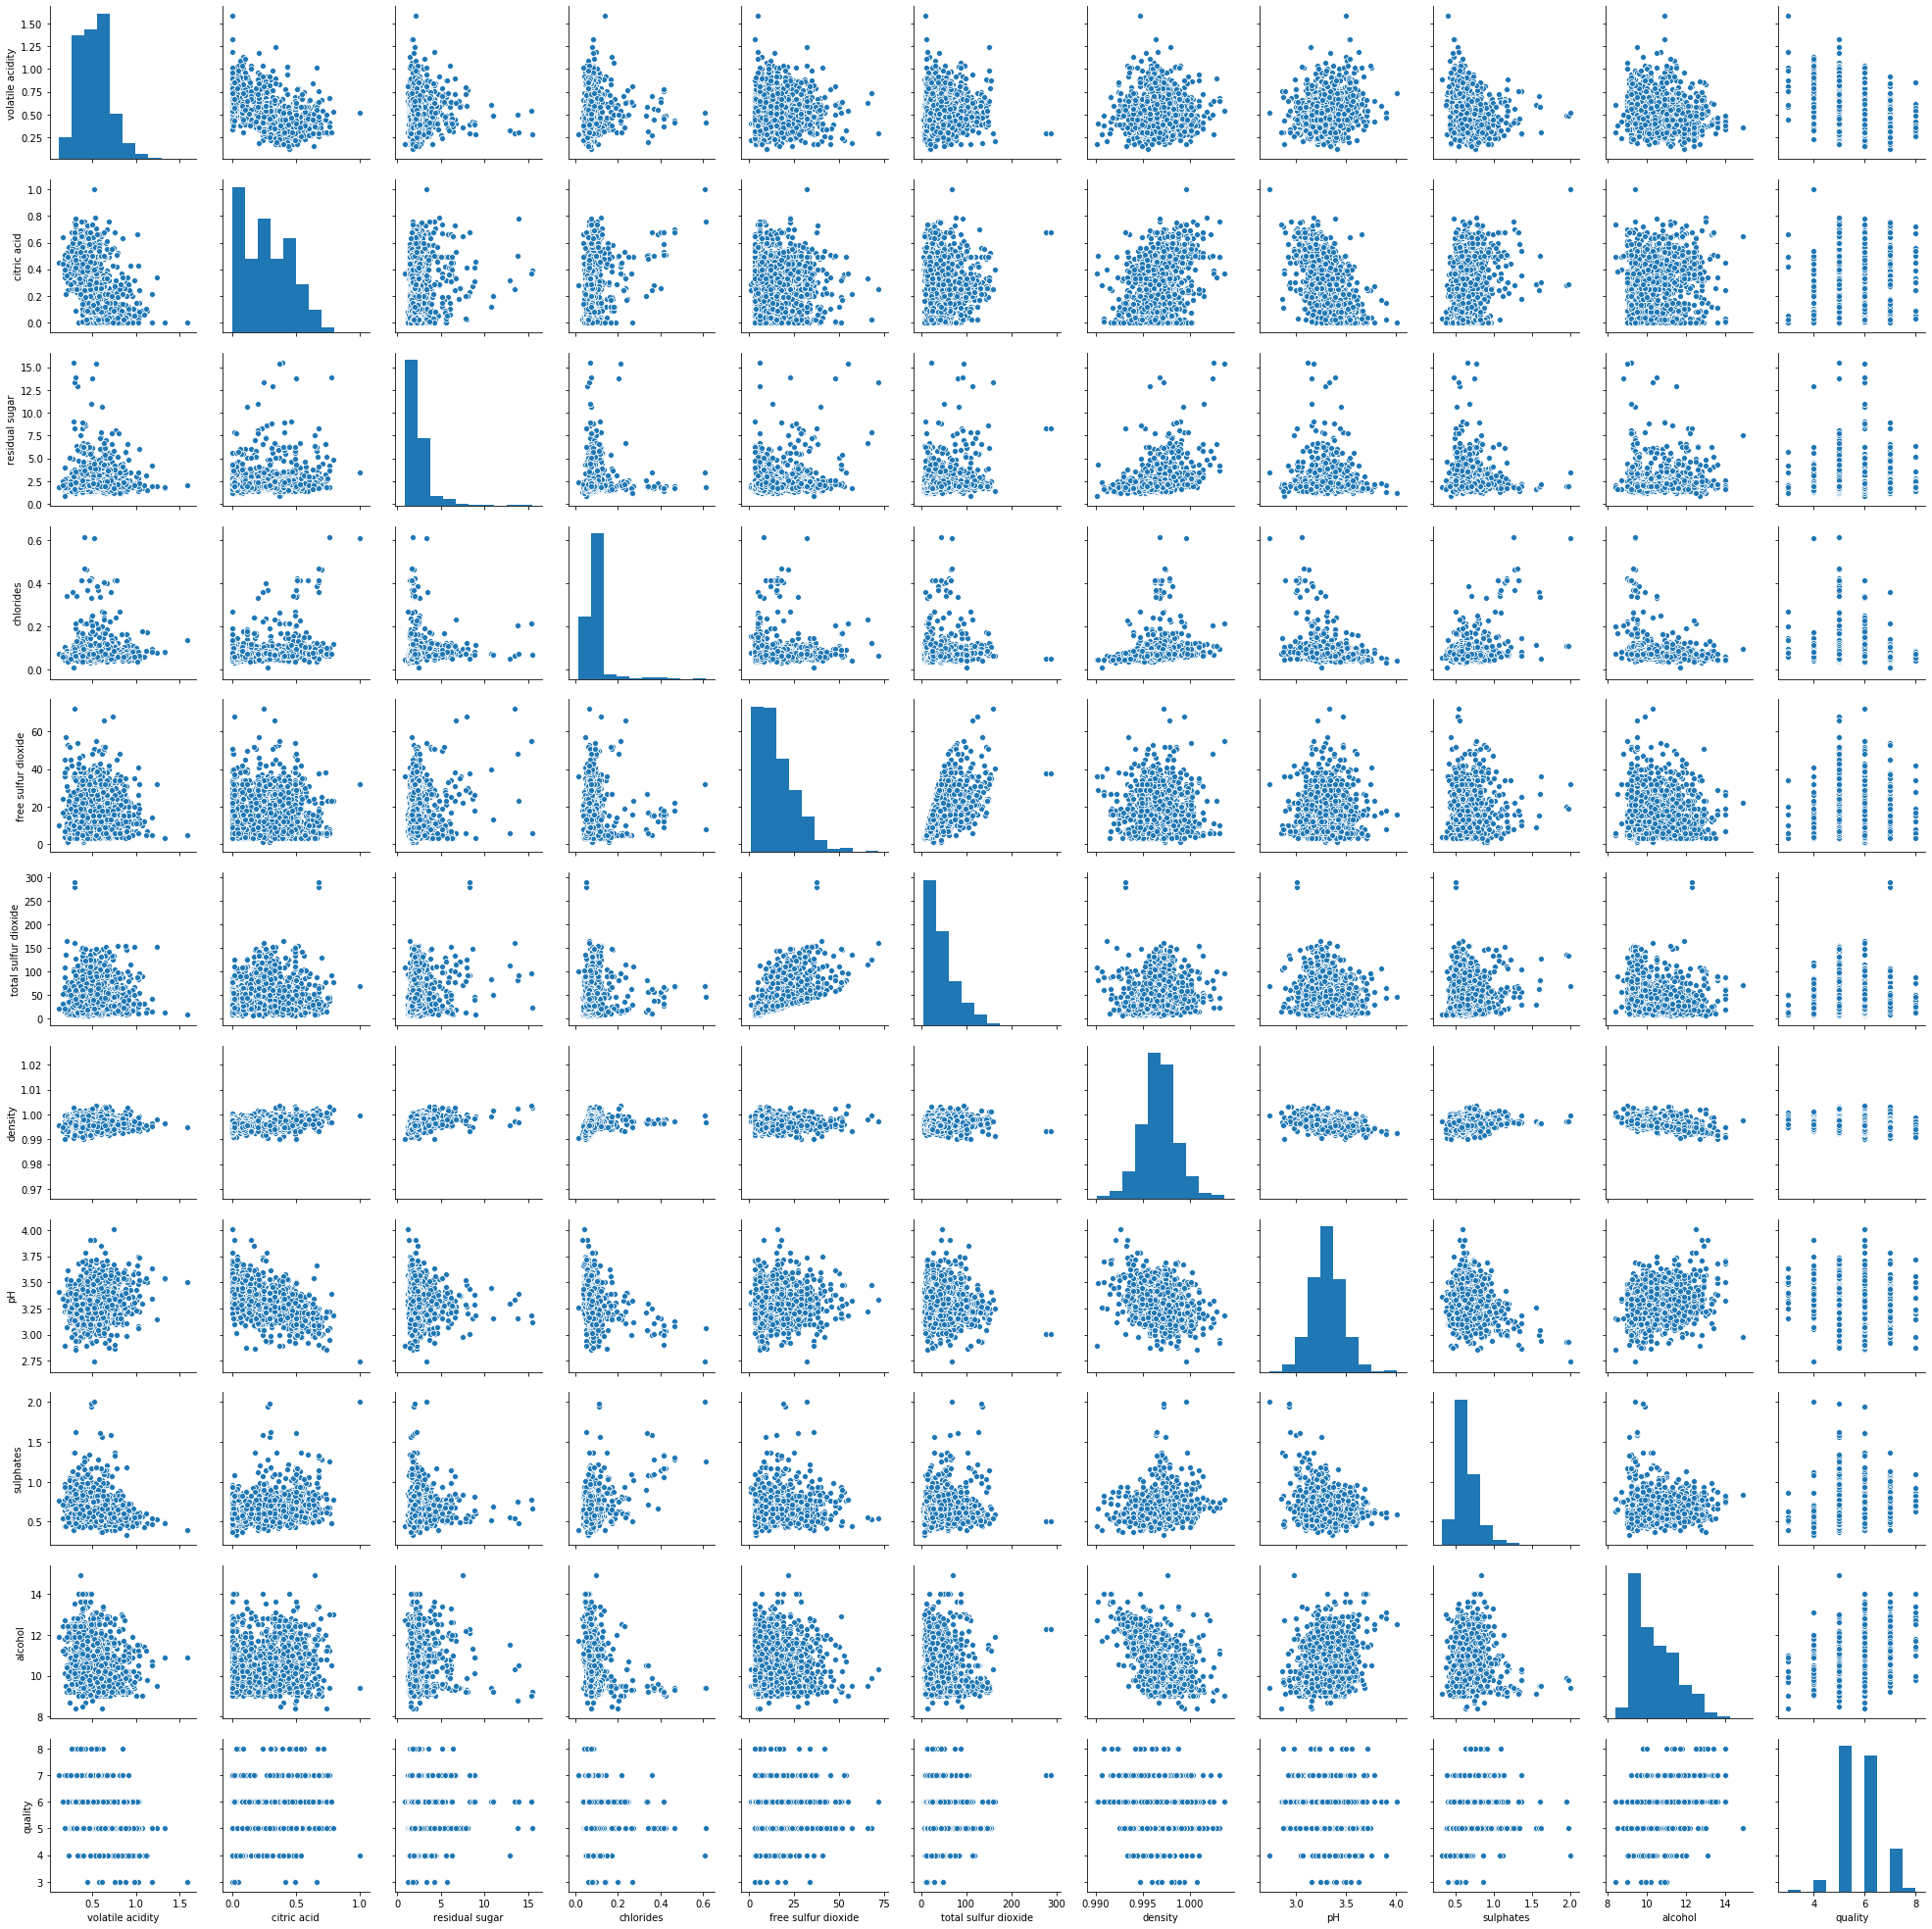

In [5]:
sns.pairplot(df.iloc[:,1:12])

In [10]:
# correlation
cor = df.iloc[:,1:11].corr()
cor

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
volatile acidity,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595
alcohol,-0.202288,0.109903,0.042075,-0.221141,-0.069408,-0.205654,-0.496180,0.205633,0.093595,1.000000


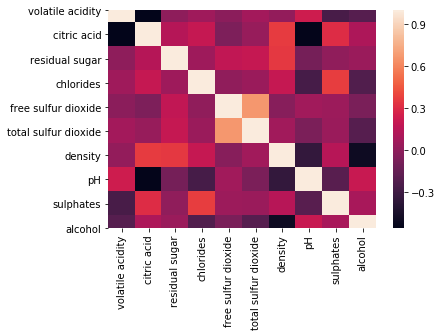

In [9]:
sns.heatmap(cor)

create trinary outcome

In [62]:
df.loc[df['quality'] >6,'qual']=2
df.loc[df['quality']==6,'qual']=1
df.loc[df['quality'] <=5,'qual']=0
df['qual'] = df['qual'].astype(int)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [63]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.670419
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.701915
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,2.000000


prepare train and test datasets

In [64]:
x = df.iloc[:,0:11].values
y = df.iloc[:,12].values

In [65]:
y

array([0, 0, 0, ..., 1, 0, 1])

In [79]:
xtrain, xtest, ytrain,ytest = train_test_split(x,y,test_size = 0.3, stratify = y)

normalize data to same scale

In [80]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [81]:
ytrain

array([1, 0, 1, ..., 2, 0, 1])

create model

In [87]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'gini', random_state = 42)
classifier.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

predict and check prediction outcome

In [88]:
ypred = classifier.predict(xtest)
confusion_matrix(ytest, ypred)

array([[180,  41,   2],
       [ 51, 129,  12],
       [  4,  28,  33]], dtype=int64)

In [89]:
classifier.score(xtest,ytest) # accuracy

0.7125

In [90]:
report = pd.DataFrame(classifsication_report(ytest, ypred,output_dict=True))
report

,0,1,2,accuracy,macro avg,weighted avg
precision,0.765957,0.651515,0.702128,0.7125,0.706533,0.711537
recall,0.807175,0.671875,0.507692,0.7125,0.662247,0.712500
f1-score,0.786026,0.661538,0.589286,0.7125,0.678950,0.709589
support,223.000000,192.000000,65.000000,0.7125,480.000000,480.000000


feature importance

In [91]:
feature_importances = pd.DataFrame(classifier.feature_importances_,
                                   index = df.columns[0:11],
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances # gini impurity

,importance
alcohol,0.136589
sulphates,0.126515
volatile acidity,0.116691
total sulfur dioxide,0.113949
density,0.094715
citric acid,0.076131
fixed acidity,0.073001
free sulfur dioxide,0.069443
residual sugar,0.065546
chlorides,0.064317


apply cross validation

In [109]:
param_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 3, 4, 5],
 'min_samples_split': [2, 4, 6, 8, 10],
 'n_estimators': [100,110, 120,130, 140, 150,160, 170, 180,190, 200]}

In [110]:
rf = RandomForestClassifier()
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
search = rf_random.fit(xtrain,ytrain)
best = search.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   55.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.3min finished


In [111]:
# bets score and best parameters
search.best_score_, best

(0.6925826630920465,
 {'n_estimators': 110,
  'min_samples_split': 6,
  'min_samples_leaf': 3,
  'max_features': 'auto',
  'max_depth': 90,
  'bootstrap': False})

In [113]:
# apply best parameters and get model scores
best_model = RandomForestClassifier(n_estimators= 110,
  min_samples_split= 6,
  min_samples_leaf= 3,
  max_features='auto',
  max_depth= 90,
  bootstrap=False)
best_model.fit(xtrain, ytrain)
ypred = best_model.predict(xtest)
pd.DataFrame(classification_report(ytest, ypred,output_dict=True))

,0,1,2,accuracy,macro avg,weighted avg
precision,0.785408,0.663366,0.777778,0.733333,0.742184,0.735558
recall,0.820628,0.697917,0.538462,0.733333,0.685669,0.733333
f1-score,0.802632,0.680203,0.636364,0.733333,0.706399,0.731145
support,223.000000,192.000000,65.000000,0.733333,480.000000,480.000000
